# Dask DataFrame (1)

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы: 
* Макрушин С.В. Лекция "Dask DataFrame"
* https://docs.dask.org/en/latest/dataframe.html
* Jesse C. Daniel. Data Science with Python and Dask. 

* https://docs.dask.org/en/stable/generated/dask.dataframe.DataFrame.memory_usage_per_partition.html#dask.dataframe.DataFrame.memory_usage_per_partition
* https://docs.dask.org/en/stable/generated/dask.dataframe.DataFrame.map_partitions.html#dask.dataframe.DataFrame.map_partitions
* https://docs.dask.org/en/stable/generated/dask.array.histogram.html
* https://docs.dask.org/en/stable/dataframe-categoricals.html
* https://docs.dask.org/en/stable/generated/dask.dataframe.DataFrame.pivot_table.html#dask.dataframe.DataFrame.pivot_table

* https://docs.dask.org/en/stable/best-practices.html
* https://docs.dask.org/en/stable/dashboard.html
* https://distributed.dask.org/en/stable/client.html

## Задачи для совместного разбора

1\. Создать `dask.DataFrame`. Рассмотреть основные возможности (выбор строк, работа с датами, добавление столбцов)

2\. Используя метод pipe, добавьте столбец с полом человека и нормализуйте столбцы x и y

3\. При помощи сводных таблиц посчитайте для каждой пары (gender, key) среднее значение по столбцу x.

## Лабораторная работа 12

__При решении данных задач не подразумевается использования циклов или генераторов Python в ходе работы с пакетами `numpy`, `pandas` и `dask`, если в задании не сказано обратного. Решения задач, в которых для обработки массивов `numpy`, структур `pandas` или структур `dask` используются явные циклы (без согласования с преподавателем), могут быть признаны некорректными и не засчитаны.__

В ходе выполнения все операции вычислений проводятся над `dask.DataFrame` и средствами пакета `dask`, если в задании не сказано обратного. Переход от `dask.DataFrame` к `pd.DataFrame` возможен исключительно для демонстрации результата в конце решения задачи. Если в задаче используются результаты выполнения предыдущих задач, то подразумевается, что вы используете результаты в виде `dask.DataFrame` (то есть то, что было получено до вызова `compute`, а не после).

In [1]:
import dask.dataframe as dd
import dask.array as da
import dask
import numpy as np

<p class="task" id="1"></p>

1\. В архиве `recipes_full.zip` находятся файлы, содержащие информацию об рецептах блюд. Загрузите данные из файлов этого архива в виде `dd.DataFrame` с названием `recipes`. Укажите, что в столбце `submitted` содержатся даты. Выведите на экран информацию о количестве сегментов и типе столбцов. Выведите на экран 5 первых и 5 последних строк таблицы. В случае сообщения об ошибке объясните причину и исправьте ошибку.

In [2]:
recipes = dd.read_csv('./recipes_full/*.csv', parse_dates=['submitted'])
recipes.dtypes

id                         int64
name                      object
minutes                    int64
contributor_id             int64
submitted         datetime64[ns]
n_steps                    int64
description               object
n_ingredients              int64
dtype: object

In [3]:
f'Количество сегментов: {recipes.npartitions}'

'Количество сегментов: 8'

In [4]:
recipes.head()

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,683970,vant ivoire mickies nothing,33,803776,2019-08-22,4,pat and gina neely and their family own and op...,9
1,1089012,kremsils mariposa baccala cookies class borage...,23,51579,2013-03-02,1,"a light, tasty and easy to put together chicke...",5
2,1428572,tania lander,0,68884,1980-11-09,1,a delicious melt in your mouth appetizer. for ...,5
3,1400250,heloise milli asher doogh zojirushi,24,678862,2018-04-29,3,delicious cream cheese and peach filled cresce...,1
4,387709,nutty chocolate chunk cookies,47,489552,2009-08-31,8,everyone loves these buttery cookies chock ful...,10


In [5]:
recipes.tail()

ValueError: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+---------+---------+----------+
| Column  | Found   | Expected |
+---------+---------+----------+
| minutes | float64 | int64    |
| n_steps | float64 | int64    |
+---------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'minutes': 'float64',
       'n_steps': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.

**Причина ошибки:** среди последних 5 элементов есть объекты с атрибутами 'minutes' или 'n_steps', у которых тип данных не *int64*

In [6]:
dtype={'minutes': 'float64',
       'n_steps': 'float64'}
recipes = dd.read_csv('./recipes_full/*.csv', parse_dates=['submitted'], dtype=dtype)
recipes.tail()

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
278949,1029131,tuti waffle snackies steakhouse,19.0,171345,1973-10-18,4.0,"according to a providence journal article, ama...",4
278950,1700703,noelias cheats crocante fleisch zitumbuwa,1.0,30228,2007-07-01,6.0,if possible sauté the onions and garlic in abo...,1
278951,1910650,rubbed restuffed pelmeni bedouin flavourful,60.0,591905,2009-09-26,3.0,another great recipe to add to the growing swe...,2
278952,713836,stems polpettine peezi,NaN,357389,2003-09-30,4.0,adapted from top secret recipes. love this!,9
278953,660699,clementines,64.0,29196,1973-06-03,6.0,this would make a great start to your holiday ...,8


<p class="task" id="2"></p>

2\. Выведите на экран следующую информацию:
* количество сегментов в таблице
* объем используемой памяти каждого сегмента
* количество строк в каждом сегменте
* количество строк во всей таблице.

In [7]:
%%time
# количество сегментов в таблице
recipes.npartitions

Wall time: 0 ns


8

In [11]:
%%time
# объем используемой памяти каждого сегмента
recipes.memory_usage_per_partition().compute() # в байтах

Wall time: 19.5 s


0    17853248
1    17853248
2    17853248
3    17853248
4    17853248
5    17853184
6    17853184
7    17853184
dtype: int64

In [9]:
%%time
# количество строк в каждом сегменте
recipes.map_partitions(lambda x: x.shape[0]).compute()

Wall time: 18.8 s


0    278955
1    278955
2    278955
3    278955
4    278955
5    278954
6    278954
7    278954
dtype: int64

In [10]:
%%time
# количество строк во всей таблице.
recipes.shape[0].compute()

Wall time: 18.9 s


2231637

<p class="task" id="3"></p>

3\. Воспользовавшись индексатором `loc`, отберите строки фрейма `recipes`, имеющие индекс 42. Выведите полученные строки и их количество на экран. Объясните результат в виде текстового комментария.

In [12]:
recipes_42 = recipes.loc[42]
recipes_42.compute()

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
42,223847,gyros burgers,25.0,451301,2007-04-21,5.0,this is a greek/american lamb and beef mixture...,11
42,1218643,zazu thisclose portage dahi,39.0,68357,1993-04-13,5.0,recipe is from fleischmann's breadworld.com. ...,6
42,265832,alber ensalada,35.0,1155210,1976-02-17,3.0,"this is a recipe i developed years back, it's ...",7
42,1972307,eclectic rigamarta bechamel bananarita chipiro...,30.0,82616,1996-11-29,1.0,its a a tradition in our family to have an ear...,8
42,1116892,reid pot meatza roseland trouble gougere tunes...,18.0,1389351,2003-07-24,3.0,this is a great dish for brunches. you can us...,8
42,249625,african peanut and ginger chicken,120.0,317934,2007-08-29,17.0,add precooked chicken to soup-like mixture and...,13
42,452814,pepper jack mac,45.0,174096,2011-04-03,7.0,a spicy twist on mac & cheese - delicious! i ...,7
42,1601792,fetasaganaki kalaloo kabos unbaked jhal decision,57.0,27678,1990-07-08,3.0,yummy and spicy pumpkin fudge,6


In [13]:
f'Количесвто строк: {recipes_42.shape[0].compute()}'

'Количесвто строк: 8'

**Объяснение:** в каждом сегменте индексация с нуля

**Проверка:**

In [14]:
df_pandas = recipes.compute().reset_index()

In [15]:
df_pandas_ind42 = df_pandas[df_pandas['index']==42]
df_pandas_ind42

,index,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
42,42,223847,gyros burgers,25.0,451301,2007-04-21,5.0,this is a greek/american lamb and beef mixture...,11
278997,42,1218643,zazu thisclose portage dahi,39.0,68357,1993-04-13,5.0,recipe is from fleischmann's breadworld.com. ...,6
557952,42,265832,alber ensalada,35.0,1155210,1976-02-17,3.0,"this is a recipe i developed years back, it's ...",7
836907,42,1972307,eclectic rigamarta bechamel bananarita chipiro...,30.0,82616,1996-11-29,1.0,its a a tradition in our family to have an ear...,8
1115862,42,1116892,reid pot meatza roseland trouble gougere tunes...,18.0,1389351,2003-07-24,3.0,this is a great dish for brunches. you can us...,8
1394817,42,249625,african peanut and ginger chicken,120.0,317934,2007-08-29,17.0,add precooked chicken to soup-like mixture and...,13
1673771,42,452814,pepper jack mac,45.0,174096,2011-04-03,7.0,a spicy twist on mac & cheese - delicious! i ...,7
1952725,42,1601792,fetasaganaki kalaloo kabos unbaked jhal decision,57.0,27678,1990-07-08,3.0,yummy and spicy pumpkin fudge,6


In [16]:
c_rows = [0, 278955, 278955, 278955, 278955, 278955, 278954, 278954]
df_pandas_ind42.index - np.array([sum(c_rows[:i+1]) for i in range(len(c_rows))])

Index([42, 42, 42, 42, 42, 42, 42, 42], dtype='int64')

<p class="task" id="4"></p>

4\. Выясните, сколько рецептов содержат слово `chocolate` в названии (`name`). Выведите на количество уникальных идентификаторов авторов таких рецептов.

In [17]:
recipes.head()

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,683970,vant ivoire mickies nothing,33.0,803776,2019-08-22,4.0,pat and gina neely and their family own and op...,9
1,1089012,kremsils mariposa baccala cookies class borage...,23.0,51579,2013-03-02,1.0,"a light, tasty and easy to put together chicke...",5
2,1428572,tania lander,0.0,68884,1980-11-09,1.0,a delicious melt in your mouth appetizer. for ...,5
3,1400250,heloise milli asher doogh zojirushi,24.0,678862,2018-04-29,3.0,delicious cream cheese and peach filled cresce...,1
4,387709,nutty chocolate chunk cookies,47.0,489552,2009-08-31,8.0,everyone loves these buttery cookies chock ful...,10


In [18]:
%%time
mask = recipes['name']\
    .astype('str')\
    .apply(
        lambda x: 'chocolate' in x.lower(), 
        meta=('name', 'bool')
    )

# количество рецептов со словом 'chocolate'
mask.sum().compute()

Wall time: 22.1 s


11628

In [19]:
%%time
# количество уникальных идентификаторов авторов
recipes[mask]['contributor_id'].nunique().compute()

Wall time: 21.9 s


4457

<p class="task" id="5"></p>

5\. При помощи функции `da.histogram` посчитайте значения для построения гистограммы для столбца `n_ingredients`. Визуализируйте полученные результаты при помощи функции `plt.bar`. Добавьте на рисунок 2 вертикальные линии, соответствующие квантилям уровней 0.25 и 0.75. Сделайте масштаб вертикальной оси логарифмическим.

Допускается вычисление статистики по столбцу (применение метода `compute`) до того, как будет вызван `da.histogram`. 

In [20]:
import matplotlib.pyplot as plt

In [22]:
%%time
dask.compute(recipes['n_ingredients'].min(), recipes['n_ingredients'].max())

Wall time: 20.2 s


(1, 43)

In [23]:
%%time
h, bins = da.histogram(recipes['n_ingredients'], bins=42, range=[1, 43])
h_ = h.compute()

Wall time: 19.7 s


In [25]:
%%time
q1, q3 = dask.compute(recipes['n_ingredients'].quantile(0.25), recipes['n_ingredients'].quantile(0.75))
q1, q3

Wall time: 19.8 s


(3.0, 8.0)

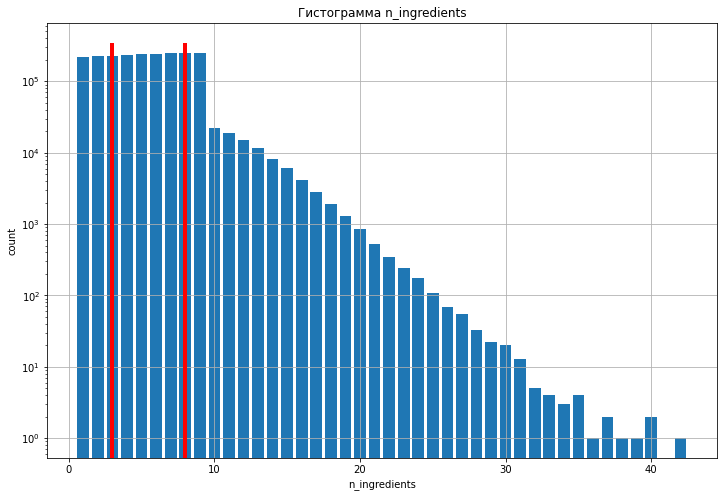

In [26]:
plt.figure(figsize=(12,8))
plt.title('Гистограмма n_ingredients')
plt.bar(bins[:-1], h_)
plt.xlabel('n_ingredients')
plt.ylabel('count')
plt.vlines([q1,q3], h_.min(), h_.max()+100_000, color='r', lw=4)
plt.yscale('log')
plt.grid()

<p class="task" id="6"></p>

6\. Напишите функции:
* `minutes_to_hours(df)`, которая принимает на вход фрейм и заменяет столбец `minutes` на столбец `hours` с соответствующим преобразованием чисел;
* `extract_ymd(df)`, которая добавляет 3 столбца: `year`, `month` и `day`, полученные на основе столбца `submitted`;
* `add_month_name(df)`, которая добавляет категориальный столбец `month_name` с названием месяца из даты и вызывает для него метод `.cat.as_known()`. 

Создайте фрейм `recipes_pipe` путем цепочки вызовов метода `pipe` с применением данных функций. Выведите на экран строку, соответствующую рецепту с id=683970. Для отбора строки воспользуйтесь методом `query`.

In [27]:
def minutes_to_hours(df):
    df = df.rename(columns={'minutes': 'hours'})
    df['hours'] = df['hours'] / 60
    return df


def extract_ymd(df):
    df['year'] = df['submitted'].dt.year
    df['month'] = df['submitted'].dt.month
    df['day'] = df['submitted'].dt.day
    return df


def add_month_name(df):
    df['month_name'] = df['submitted'].dt.strftime("%b").astype('category').cat.as_known()
    return df

In [28]:
%%time
recipes2 = recipes.copy()
recipes_pipe = (recipes2.pipe(minutes_to_hours)
         .pipe(extract_ymd)
         .pipe(add_month_name)
)

Wall time: 47.6 s


In [29]:
recipes_pipe['month_name'].cat.categories

Index(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object')

In [30]:
%%time
recipes_pipe.query('id == 683970').compute()

Wall time: 47.2 s


,id,name,hours,contributor_id,submitted,n_steps,description,n_ingredients,year,month,day,month_name
0,683970,vant ivoire mickies nothing,0.55,803776,2019-08-22,4.0,pat and gina neely and their family own and op...,9,2019,8,22,Aug


<p class="task" id="7"></p>

7\. Используя результат предыдущей задачи, постройте сводную таблицу при помощи метода `pivot_table`, где по строкам располагаются года, по столбцам - названия месяцев, а в ячейках содержится средняя длина рецептов (в часах) в данный год и месяц. Выведите таблицу на экран. Выведите на экран информацию за апрель 1970-1975 годов (включительно).

In [31]:
pt7 = dd.pivot_table(
    recipes_pipe, 
    values='hours',
    index='year',
    columns='month_name',
    aggfunc='mean'
)

In [32]:
%%time
pt7_computed = pt7.compute()
pt7_computed

Wall time: 48.7 s


month_name,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1970,0.535253,0.544904,0.535515,0.531530,0.532693,0.542781,0.544243,0.528301,0.536688,0.537969,0.532659,0.538930
1971,0.547731,0.530590,0.543796,0.533528,0.533237,0.545502,0.536644,0.535626,0.529507,0.531603,0.542461,0.545521
1972,0.531383,0.543788,0.540724,0.527673,0.527548,0.539933,0.530001,0.543361,0.539681,0.545566,0.536516,0.542677
1973,0.533646,0.546603,0.542902,0.538645,0.539917,0.530634,0.535194,0.533162,0.534956,0.538673,0.535226,0.528227
1974,0.540382,0.528316,0.535279,0.539811,0.535436,0.542733,0.532864,0.540594,0.542213,0.537463,0.536957,0.536616
1975,0.535514,0.534260,0.534445,0.533850,0.543938,0.538529,0.534805,0.539711,0.530531,0.541481,0.529238,0.548624
1976,0.543596,0.536620,0.532532,0.534188,0.548785,0.540760,0.528133,0.538327,0.537886,0.532967,0.540424,0.542933
1977,0.534943,0.536607,0.541353,0.537868,0.531178,0.542600,0.538966,0.532360,0.533895,0.536143,0.529759,0.531099
1978,0.536417,0.540905,0.540035,0.533373,0.538842,0.539100,0.539322,0.529556,0.537688,0.534920,0.545526,0.545815


In [33]:
pt7_computed.loc[1970:1975, ['Apr']]

month_name,Apr
year,
1970,0.535253
1971,0.547731
1972,0.531383
1973,0.533646
1974,0.540382
1975,0.535514


<p class="task" id="8"></p>

8\. В архиве `recipes_additional.zip` находятся файлы, содержащие информацию об рецептах блюд, полученные из другого источника. В связи с этим названия и количество столбцов в этих данных отличаются от того, что находится в архиве `recipes_full.zip`.

Объедините два набора набора данных (добавьте строки из одного набора данных к другому), согласовав названия столбцов и форматы данных. Итоговый фрейм должен содержать следующие колонки: `id`, `name`, `minutes`, `contributor_id`, `submitted`, `n_steps`, `description`, `n_ingredients`, `#tags` и `view_30_days`. Добавьте столбец `dset` с информацией о том, из какого датасета была получены данные.

Выведите на экран количество пропусков в каждом из столбцов полученной таблицы и общее количество строк в ней.

In [34]:
import pandas as pd

In [35]:
bad_df1 = pd.read_csv('./recipes_additional/recipes_additional_1.csv')
bad_df3 = pd.read_csv('./recipes_additional/recipes_additional_3.csv')

In [36]:
bad_df1.head()

,name,description,hours,date_of_publication,#tags,#ingredients,recipe_id,views_30_days,minutes,n_steps
0,rumtedum ear shakuti ange annabel schweinebraten,"this comes from ""jo sealard's new zealand coun...",0.883333,06/02/2015,1,7,17b91c,1325,NaN,NaN
1,caithiseach jji rolly flor hagel shaat babci,from a great website i found.,0.150000,31/08/2016,7,8,154610,2814,NaN,NaN
2,huancaina jouw gujrati fields imperial reinertsen,this is a really good one dish meal. spicy com...,0.533333,25/09/1991,8,2,10fc11,2171,NaN,NaN
3,nougatstangerl einab ancho rounds restful ched...,i got this recipe out of the newspapaer. this ...,0.250000,17/05/1984,9,6,1ab2ee,4310,NaN,NaN
4,valtrompia lee wall,a wonderful reliable tasty recipe for making g...,1.000000,16/04/2011,12,4,917e5,2977,NaN,NaN


In [37]:
bad_df3.head()

,name,description,hours,date_of_publication,#tags,#ingredients,recipe_id,views_30_days,minutes,n_steps
0,arabiatta lahuhs vandermint calder kachoomber ...,this is really easy! posted for zaar world tou...,0.266667,03/09/2006,13,3,5c4f3,4641,NaN,NaN
1,mamas hronek mor proper lima,you can make this in your crock pot to keep it...,0.116667,07/04/1999,1,1,145305,4908,NaN,NaN
2,tastebuds careful cemetery delirious zejt max ...,NaN,0.833333,08/08/2001,1,8,14af9c,2028,NaN,NaN
3,pozole injera necessary kihen,i found this online today and couldn't resist ...,0.816667,07/11/2005,4,3,14fb64,2332,NaN,NaN
4,quark trails brewery skinkpaj kolache indienne...,"this counts as one ""protein"" on the l.a. weigh...",0.233333,28/05/1989,14,8,983f8,3139,NaN,NaN


**В двух файлах есть пустые столбцы 'minutes' и 'n_steps'**

In [38]:
#dtype8 = {'#tags': 'int64', 'view_30_days': 'float64'}
cols = ['name', 'description', 'hours', 'date_of_publication', '#tags', '#ingredients', 'recipe_id', 'views_30_days']

recipes_add = dd.read_csv('./recipes_additional/*.csv', usecols=cols, parse_dates=['date_of_publication'], date_format='%d/%m/%Y', )
recipes_add.head()

,name,description,hours,date_of_publication,#tags,#ingredients,recipe_id,views_30_days
0,blue cheese tenders,found this recipe in my mom's older recipes. ...,0.333333,2008-02-01,12,5,52604,2001
1,hindi frappes tikkis siro changling anya jerkll,this is one i found on a post-it in my kitchen...,0.550000,1983-06-25,13,3,1ef55e,4691
2,navratan padma beehoon contest carrot,ok...here in the us avocados are used in savor...,0.433333,2007-12-19,9,5,6ccf2,3823
3,camptown two hurry laddi,i got this out of southern living magazine and...,0.133333,1998-11-06,3,4,6bb49,3202
4,down on the farm sausage bake,definite comfort food for me and my family.,1.250000,2002-10-16,5,13,dd23,2143


In [39]:
%%time
recipes_add = recipes_add.rename(
    columns = {
        'recipe_id': 'id',
        'hours': 'minutes',
        '#ingredients': 'n_ingredients',
        'date_of_publication': 'submitted'
    }
)

recipes_add['dset'] = 'additional'
recipes_add['minutes'] = recipes_add['minutes']*60
recipes_add.head()

Wall time: 5.16 s


,name,description,minutes,submitted,#tags,n_ingredients,id,views_30_days,dset
0,blue cheese tenders,found this recipe in my mom's older recipes. ...,20.0,2008-02-01,12,5,52604,2001,additional
1,hindi frappes tikkis siro changling anya jerkll,this is one i found on a post-it in my kitchen...,33.0,1983-06-25,13,3,1ef55e,4691,additional
2,navratan padma beehoon contest carrot,ok...here in the us avocados are used in savor...,26.0,2007-12-19,9,5,6ccf2,3823,additional
3,camptown two hurry laddi,i got this out of southern living magazine and...,8.0,1998-11-06,3,4,6bb49,3202,additional
4,down on the farm sausage bake,definite comfort food for me and my family.,75.0,2002-10-16,5,13,dd23,2143,additional


In [40]:
%%time
ddf8 = dd.concat([recipes, recipes_add]).fillna(value={'dset': 'recipe'})
ddf8.head()

Wall time: 3.41 s


,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients,#tags,views_30_days,dset
0,683970,vant ivoire mickies nothing,33.0,803776.0,2019-08-22,4.0,pat and gina neely and their family own and op...,9,NaN,NaN,recipe
1,1089012,kremsils mariposa baccala cookies class borage...,23.0,51579.0,2013-03-02,1.0,"a light, tasty and easy to put together chicke...",5,NaN,NaN,recipe
2,1428572,tania lander,0.0,68884.0,1980-11-09,1.0,a delicious melt in your mouth appetizer. for ...,5,NaN,NaN,recipe
3,1400250,heloise milli asher doogh zojirushi,24.0,678862.0,2018-04-29,3.0,delicious cream cheese and peach filled cresce...,1,NaN,NaN,recipe
4,387709,nutty chocolate chunk cookies,47.0,489552.0,2009-08-31,8.0,everyone loves these buttery cookies chock ful...,10,NaN,NaN,recipe


In [41]:
ddf8.tail()

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients,#tags,views_30_days,dset
325814,20eadf,plas hachis,35.0,NaN,1997-06-29,NaN,"if you like the sound of this, you are gonna l...",1,5.0,667.0,additional
325815,14d0d8,stephen jackpot guatemalan bredie cocoatana ma...,42.0,NaN,1981-09-16,NaN,a cool and creamy dessert!,9,10.0,2269.0,additional
325816,1c0728,derves camp schmere krbissuppe fldekager,15.0,NaN,1999-01-22,NaN,quick and easy. tasty alternative to tradition...,4,5.0,681.0,additional
325817,eb528,texans zuring mumble limas bouclair besan duvall,59.0,NaN,1973-02-07,NaN,5-ingredient fix contest entry. tasty little ...,5,9.0,3683.0,additional
325818,6d753,voi buying soutzoukakia mona biskvi uukkous tr...,52.0,NaN,2009-08-16,NaN,this sounds tasty and quick and easy to make. ...,9,2.0,1244.0,additional


In [44]:
%%time
# количество пропусков в каждом из столбцов
(ddf8.isna().sum()).compute()

Wall time: 59.8 s


id                      0
name                   23
minutes             15871
contributor_id    1629095
submitted               0
n_steps           1629095
description         82965
n_ingredients           0
#tags             2231637
views_30_days     2231637
dset                    0
dtype: int64

In [45]:
%%time
# общее количество
ddf8.shape[0].compute()

Wall time: 52.4 s


3860732